<a href="https://colab.research.google.com/github/Eduardoqro/Kata-Data-Visualization/blob/main/Modulo_6__ex03_marcopeixCH02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from https://colab.research.google.com/github/marcopeix/TimeSeriesForecastingInPython/blob/master/CH02/CH02.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Plot data with train/test split 

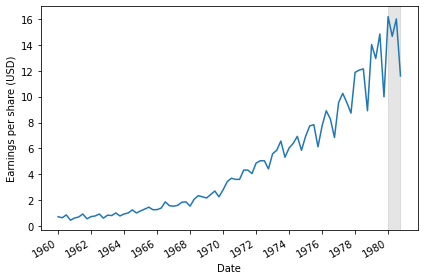

In [4]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F01_peixeiro.png', dpi=300)

# Split to train/test 

In [ ]:
train = df[:-4]
test = df[-4:]
test

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Predict historical mean 

In [ ]:
historical_mean = np.mean(train.data)
historical_mean

4.3084999875

In [ ]:
pred_hist_mean = pd.DataFrame()
pred_hist_mean['date'] = test.date
pred_hist_mean['pred'] = historical_mean

pred_hist_mean

,date,pred
80,1980-01-01,4.3085
81,1980-04-01,4.3085
82,1980-07-02,4.3085
83,1980-10-01,4.3085


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_hist_mean = mape(test.data, pred_hist_mean.pred)
mape_hist_mean

70.00752579965118

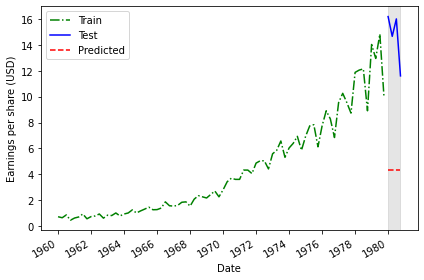

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.date, train.data, 'g-.', label='Train')
ax.plot(test.date, test.data, 'b-', label='Test')
ax.plot(pred_hist_mean.date, pred_hist_mean.pred, 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

# Predict last year mean 

In [ ]:
last_year_mean = np.mean(train.data[-4:])
last_year_mean

12.96

In [ ]:
pred_last_year_mean = pd.DataFrame()
pred_last_year_mean['date'] = test.date
pred_last_year_mean['pred'] = last_year_mean

pred_last_year_mean

,date,pred
80,1980-01-01,12.96
81,1980-04-01,12.96
82,1980-07-02,12.96
83,1980-10-01,12.96


In [ ]:
mape_last_year_mean = mape(test.data, pred_last_year_mean.pred)
mape_last_year_mean

15.5963680725103

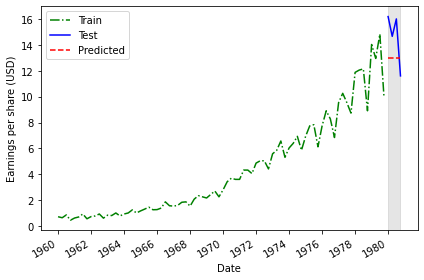

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.date, train.data, 'g-.', label='Train')
ax.plot(test.date, test.data, 'b-', label='Test')
ax.plot(pred_last_year_mean.date, pred_last_year_mean.pred, 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [ ]:
last = train.data.iloc[-1]
last

9.99

In [ ]:
pred_last = pd.DataFrame()
pred_last['date'] = test.date
pred_last['pred'] = last

pred_last

,date,pred
80,1980-01-01,9.99
81,1980-04-01,9.99
82,1980-07-02,9.99
83,1980-10-01,9.99


In [ ]:
mape_last = mape(test.data, pred_last.pred)
mape_last

30.457277908606535

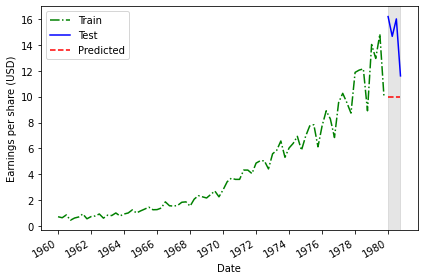

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.date, train.data, 'g-.', label='Train')
ax.plot(test.date, test.data, 'b-', label='Test')
ax.plot(pred_last.date, pred_last.pred, 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

In [ ]:
pred_naive_seasonal = pd.DataFrame()
pred_naive_seasonal['date'] = test.date
pred_naive_seasonal['pred'] = train.data[-4:].values

pred_naive_seasonal

,date,pred
80,1980-01-01,14.04
81,1980-04-01,12.96
82,1980-07-02,14.85
83,1980-10-01,9.99


In [ ]:
mape_naive_seasonal = mape(test.data, pred_naive_seasonal.pred)
mape_naive_seasonal

11.561658552433654

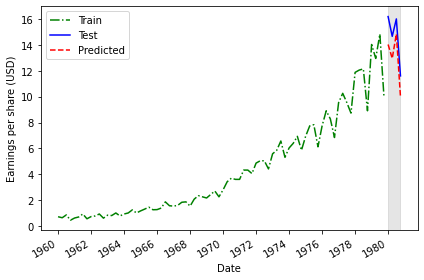

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.date, train.data, 'g-.', label='Train')
ax.plot(test.date, test.data, 'b-', label='Test')
ax.plot(pred_naive_seasonal.date, pred_naive_seasonal.pred, 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

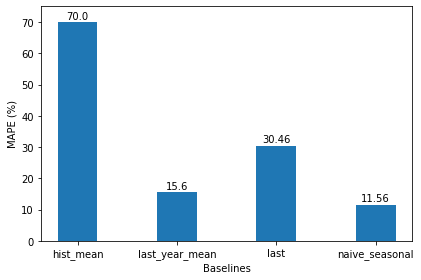

In [ ]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

#plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)